## Шаг 6: Пишем свою собственную единую RAG-систему


### Цель:
Это заключительная и даже экспериментальная часть нашего проекта, в которой вы интегрируете все полученные знания и инструменты в единое целое, создавая рабочую систему, которая сможет обрабатывать запросы пользователей с использованием передовых технологий, таких как **RAG** (Retrieval-Augmented Generation), **MistralAI** для генерации ответов, и **Qdrant** для хранения и поиска векторных данных. Важно, что вы будете использовать API, что делает решение более гибким и масштабируемым, а также позволяет эффективно использовать модель без необходимости в мощных GPU-серверов.

**Заключительная часть:**  
В этой части задания вам предстоит:
1. Реализовать поиск релевантных данных в векторной базе **Qdrant**.
2. Создать промпт для **MistralAI**, который будет использовать информацию из базы данных.
3. Построить чат-бота с использованием **MistralAI** через API, который будет отвечать на запросы пользователей, опираясь на релевантную информацию, полученную из базы данных.

### Теория

#### **Что такое RAG (Retrieval-Augmented Generation)?**

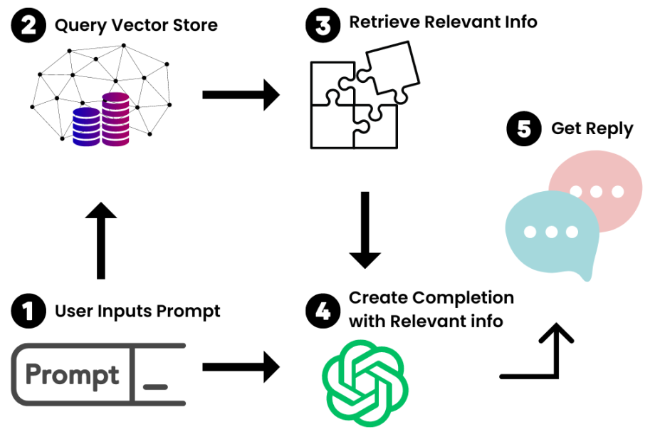

**RAG** — это модель, использующая комбинированный подход, где сначала выполняется **извлечение информации** (retrieval) из внешней базы данных или коллекции, а затем генерируется ответ с помощью **генеративной модели**. Это позволяет использовать заранее подготовленную информацию (например, вопросы и ответы, описания курсов), которая значительно улучшает точность и релевантность ответов модели.

В нашем случае, **RAG** используется для извлечения релевантных чанков информации о курсах из векторной базы данных **Qdrant** и последующего создания **промпта** для генерации ответа с помощью модели **MistralAI**.

#### **Почему используем MistralAI?**

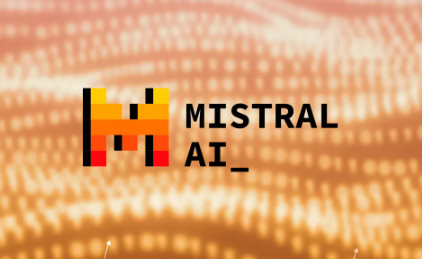

**MistralAI** — это генеративная языковая модель, которая специально оптимизирована для работы с текстами на русском языке и предлагает бесплатный доступ в России без необходимости использования VPN. Мы выбираем именно **MistralAI** по следующим причинам:
- **Доступность в РФ без VPN**: Многие другие языковые модели могут требовать дополнительных усилий для доступа в РФ, а **MistralAI** доступна напрямую.
- **API**: Модель доступна через **API**, что позволяет быстро и без дополнительной настройки интегрировать её в наш процесс. Использование **API** позволяет обрабатывать запросы быстро, не требуя мощных серверов с GPU, что делает решение легким и доступным для использования в любых проектах.
- **Оптимизация по скорости**: Модель работает быстро через API, что важно для задач, где требуется быстро получать ответы на запросы пользователя.

#### **Почему используем API?**
Использование **API** от MistralAI позволяет избежать необходимости установки тяжелых моделей на локальные машины или серверы с GPU, что делает систему более масштабируемой и быстрой. В сочетании с **Qdrant** и **RAG** это решение позволяет эффективно выполнять поиск и генерацию ответов в реальном времени.

#### **Регистрация и получения API**
Если у вас ещё нет аккаунта на сайте Mistral AI, то перейдите на официальный [сайт](https://mistral.ai/), регистрация и получение ключа интуитивно понятны.

---

#### Что такое **Prompt Engineering**:

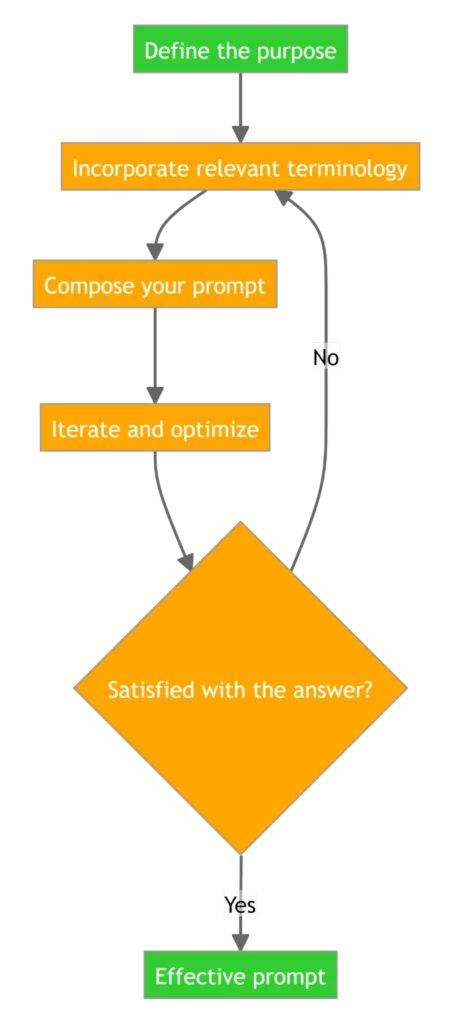

**Prompt engineering** — это процесс создания правильных и эффективных запросов (промптов) для языковых моделей. Правильно сформулированный промпт может значительно улучшить качество и релевантность ответов, в то время как плохой или неструктурированный запрос может привести к неадекватным или неэффективным результатам.

**Как правильно составлять промпты**:
1. **Будьте конкретными**: Четко формулируйте задачу или вопрос. Чем яснее и точнее запрос, тем выше вероятность того, что модель ответит корректно.
   - Пример: "На основе предоставленных данных, расскажи мне, какова стоимость курса по Data Science?" — хороший запрос.
   - Пример плохого запроса: "Что о курсе по Data Science?" — слишком неопределённый и может привести к размытым ответам.

2. **Учитывайте контекст**: Важно учитывать, что модель может отвечать лучше, если в запрос включена дополнительная информация. В нашем случае, контекст предоставляется через данные из **Qdrant**, где содержатся эмбеддинги вопросов, ответов и информации о курсах.

3. **Избегайте многозначных фраз**: Старайтесь избегать фраз с несколькими возможными трактовками, так как это может привести к путанице.
   - Пример: "Расскажи о курсе" — неясно, о каком курсе идет речь.
   - Правильно: "Расскажи о курсе по Data Science, который начинается в мае."

4. **Добавляйте примеры**: Для улучшения результата можно добавить примеры правильных ответов в промпт. Это помогает модели понимать формат и стиль ответа.

**Как делать не надо:**
- **Нечеткие или слишком длинные запросы**: Убедитесь, что ваш запрос легко воспринимается моделью. Длинные, многословные или неструктурированные запросы могут затруднить получение правильного ответа.
- **Отсутствие контекста**: Если не указать нужную информацию в промпте, модель может не понять, что от нее требуется, и дать общее или несоответствующее ответ.

---

#### О **LangChain** и его роли в решении задачи

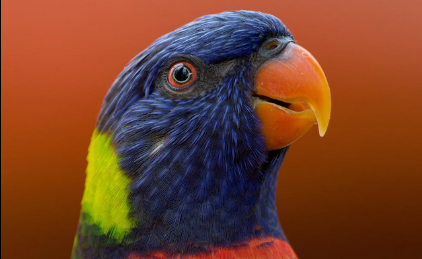

**LangChain** — это библиотека, которая предназначена для упрощения работы с **языковыми моделями** (LLMs) и автоматизации задач, таких как обработка контекста, создание промптов, управление памятью и интеграция различных источников данных. Она предоставляет инструменты для эффективного взаимодействия с языковыми моделями и позволяет более удобно работать с большими объемами данных, а также управлять состоянием разговоров и контекстом.

#### **Как LangChain помогает в решении нашей задачи**:

1. **Суммаризация контекста**:
   LangChain помогает собирать и упорядочивать релевантную информацию из базы данных (например, из **Qdrant**) и генерировать краткие и четкие контексты для промптов. Это улучшает точность модели, так как модель получает только нужные данные, без лишней информации.

2. **Интеграция LLM**:
   LangChain предоставляет простые интерфейсы для интеграции с различными языковыми моделями, такими как **MistralAI**. Это позволяет нам без проблем объединять поиск в базе данных и генерацию ответов, используя мощные модели NLP.

3. **Управление памятью**:
   LangChain помогает управлять памятью чат-бота, например, сохраняя историю взаимодействий с пользователем, что важно для создания более персонализированных и точных ответов на основе предыдущих запросов.

4. **Создание промптов**:
   С помощью LangChain можно легко генерировать и модифицировать промпты для модели, включая в них релевантную информацию из базы данных и текущий запрос пользователя. Это позволяет точно настраивать взаимодействие с LLM и делать ответы более точными и соответствующими запросу.

Таким образом, **LangChain** играет ключевую роль в упрощении работы с языковыми моделями, интеграции различных источников данных и управлении памятью, что делает его ценным инструментом для нашей задачи по созданию чат-бота на основе RAG-модели.

## Практическая часть

#### **Задание 1: Функция поиска релевантных чанков в Qdrant**

1. Напишите функцию **`search_similar(query, top_k=5)`**, которая будет искать самые релевантные чанки текста в базе данных **Qdrant** на основе векторного представления запроса пользователя.
   
   **Что нужно сделать:**
   - Получите векторное представление запроса с помощью модели **Sentence-BERT**.
   - Используйте **Qdrant** для поиска наиболее релевантных чанков в базе данных.
   - Верните топ-N самых схожих чанков, отсортированных по релевантности.

   **Параметры**:
   - `query` — строка запроса от пользователя.
   - `top_k` — количество возвращаемых результатов.

---

#### **Задание 2: Функция создания RAG-промпта**

2. Напишите функцию **`create_rag_prompt(query, top_k=5)`**, которая будет создавать промпт для модели **MistralAI**, основываясь на информации из найденных чанков. Промпт должен включать текст запроса пользователя и контекст из **Qdrant** (самые релевантные чанки).

   **Что нужно сделать:**
   - Используйте функцию поиска релевантных чанков из Задания 1.
   - Создайте текстовый контекст, в который вставьте информацию из найденных чанков.
   - Постройте промпт для модели, который будет включать в себя:
     - Запрос пользователя.
     - Контекст из базы данных (релевантные вопросы и ответы или описание курса).

   **Параметры**:
   - `query` — запрос пользователя.
   - `top_k` — количество найденных релевантных чанков.

   **Возвращаемое значение**:
   - Промпт для генерации ответа с моделью **MistralAI**.

---

#### **Задание 3: Реализация чат-бота с использованием API от MistralAI**

3. Напишите функцию **`start_messaging()`**, которая будет запускать чат-бота, использующего модель **MistralAI** через API. Бот должен отвечать на запросы пользователя, используя информацию, извлеченную из базы данных с помощью **RAG**.

   **Что нужно сделать:**
   - Используйте функцию для создания промпта, построенную в Задании 2.
   - Используйте **API от MistralAI** для генерации ответов на основе созданного промпта.
   - Важно, чтобы бот вел диалог с пользователем, используя только релевантную информацию из базы данных (не выдавая лишние данные или неправдоподобные факты).

   **Параметры**:
   - `rag_top_k` — количество наиболее релевантных чанков для создания контекста (по умолчанию - 5).
   - `max_memory_size` — максимальный размер памяти, который может быть использован ботом (по умолчанию - 4096 токенов).

   **Реализация**:
   - Бот должен обрабатывать ввод пользователя, генерировать запросы к базе данных и отвечать пользователю с использованием модели.
   - Учитывайте, что нужно следить за размером памяти, и не допускать её переполнения.

   **Пример работы**:
   - После запуска чат-бота, он будет ожидать запросов от пользователя, искать релевантные данные в базе, создавать промпт для модели и генерировать ответ. Для завершения диалога достаточно ввести команду "выход".

---

### Ожидаемые функции:

1. **`search_similar(query, top_k=5)`** — поиск релевантных чанков в **Qdrant**.
2. **`create_rag_prompt(query, top_k=5)`** — создание промпта для **MistralAI** с использованием информации из **Qdrant**.
3. **`start_messaging()`** — запуск чат-бота с использованием **MistralAI** через API для общения с пользователем.

### Ожидаемые результаты:
- Функции поиска и создания промпта должны быть связаны с векторной базой **Qdrant**, которая хранит данные в виде эмбеддингов.
- Чат-бот должен отвечать на запросы пользователя, используя релевантную информацию из базы данных.

---

### Подсказки:
- Используйте **prompt engineering** для того, чтобы составить максимально точные и информативные запросы, которые помогут модели генерировать правильные ответы.
- При создании промптов обязательно используйте **поиск по векторной базе данных** для того, чтобы добавить релевантные данные в контекст запроса.
- Модель **MistralAI** через **API** позволит вам быстро интегрировать систему без необходимости в специализированных вычислительных мощностях.

---

### Что проверяется:
- Правильность работы функции `search_similar`.

**Почему проверяется только работа одной функции:** Трудно проверить точность работы функции `start_messaging`, поскольку модель генерирует разнообразные ответы, зависящие от множества факторов (формулировка запроса, контекст, история диалога). Ответы могут сильно варьироваться, даже если они все релевантны. Тестирование точности модели бессмысленно без четких критериев правильности.

Рационально проверять только функцию поиска релевантных документов, так как это объективный процесс, где можно заранее определить, какие данные должны быть извлечены для запроса. Проверка поиска документов гарантирует, что извлекаются правильные данные, а не зависит от вариативности генерации ответа.

### Как сдавать задание:

- Определите переменную `qdrant_client`, в которой инициализированая ваша база данных (с ссылкой и API-ключём) и `model` (ваша предобученная SBERT-модель для поиска релевантных документов).
- Запишите вашу готовую функцию `search_similar`.
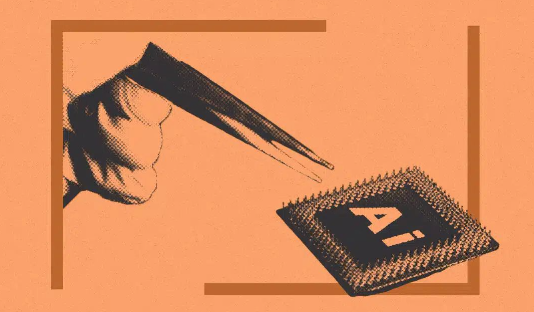
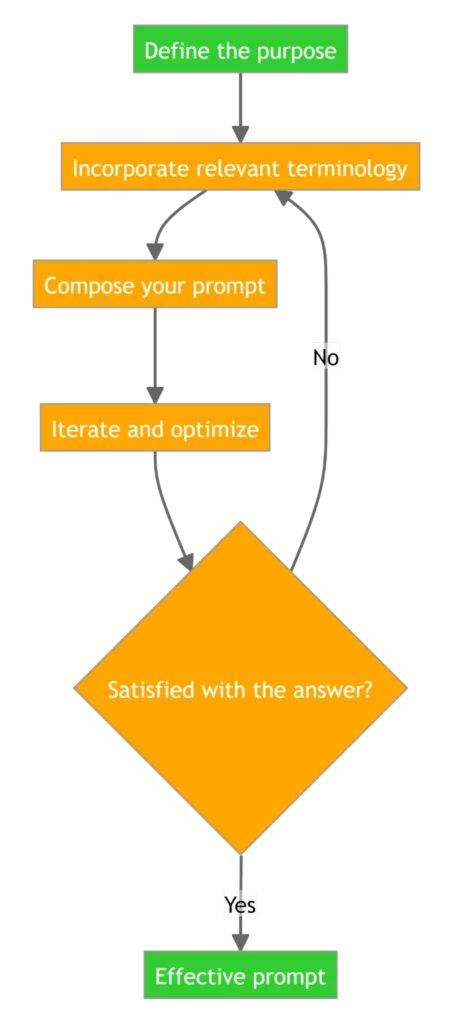

## Практическая часть

### Задание 1: Функция поиска релевантных чанков в Qdrant

#### Решение студента

In [ ]:
from typing import List, Tuple

def search_similar(query: str, top_k: int = 5) -> List[Tuple[str, object]]:
    """
    Ищет наиболее релевантные чанки в базе данных Qdrant, используя векторное представление запроса.

    Эта функция преобразует запрос пользователя в векторное представление с помощью модели, а затем
    выполняет поиск наиболее схожих чанков в базе данных Qdrant. Возвращает топ-N наиболее релевантных результатов.

    Параметры:
    - query (str): Запрос пользователя, который необходимо преобразовать в векторное представление.
    - top_k (int): Количество возвращаемых результатов. По умолчанию 5.

    Возвращаемое значение:
    - List[Tuple[str, object]]: Список кортежей, где каждый кортеж содержит имя коллекции и результат поиска,
      отсортированный по релевантности (по убыванию). Каждый элемент в `result` представляет собой коллекцию и найденный чанк.

    Пример:
    >>> result = search_similar("Какие курсы по Data Science вы предлагаете?")
    >>> print(result)  # [('karpov-guide-faq', <PointStruct>), ...]
    """
    query_embedding = ...

    all_collections = qdrant_client.get_collections()
    result = []

    for collection in all_collections.collections:
        collection_name = collection.name
        
        search_result = qdrant_client.search(
            collection_name=collection_name,
            query_vector=query_embedding,
            limit=top_k
        )

        for seq in search_result:
            result.append((collection_name, seq))

    result = sorted(result, key=lambda x: x[1].score, reverse=True)
    
    return result

#### Эталонное решение

In [ ]:
from typing import List, Tuple

def search_similar(query: str, top_k: int = 5) -> List[Tuple[str, object]]:
    """
    Ищет наиболее релевантные чанки в базе данных Qdrant, используя векторное представление запроса.

    Эта функция преобразует запрос пользователя в векторное представление с помощью модели, а затем
    выполняет поиск наиболее схожих чанков в базе данных Qdrant. Возвращает топ-N наиболее релевантных результатов.

    Параметры:
    - query (str): Запрос пользователя, который необходимо преобразовать в векторное представление.
    - top_k (int): Количество возвращаемых результатов. По умолчанию 5.

    Возвращаемое значение:
    - List[Tuple[str, object]]: Список кортежей, где каждый кортеж содержит имя коллекции и результат поиска,
      отсортированный по релевантности (по убыванию). Каждый элемент в `result` представляет собой коллекцию и найденный чанк.

    Пример:
    >>> result = search_similar("Какие курсы по Data Science вы предлагаете?")
    >>> print(result)  # [('karpov-guide-faq', <PointStruct>), ...]
    """
    query_embedding = model.encode(query, show_progress_bar=False)

    all_collections = qdrant_client.get_collections()
    result = []

    for collection in all_collections.collections:
        collection_name = collection.name
        
        search_result = qdrant_client.search(
            collection_name=collection_name,
            query_vector=query_embedding,
            limit=top_k
        )

        for seq in search_result:
            result.append((collection_name, seq))

    result = sorted(result, key=lambda x: x[1].score, reverse=True)
    
    return result

### Задание 2: Функция создания RAG-промпта

#### Решение студента

In [ ]:
def create_rag_prompt(query: str, top_k: int = 5) -> str:
    """
    Создает промпт для генерации ответа с использованием RAG-модели на основе запроса пользователя и релевантных данных из базы.

    Эта функция принимает запрос пользователя, выполняет поиск релевантных чанков информации в базе данных, 
    а затем формирует промпт для языковой модели. Промпт включает в себя как сам запрос, так и контекст из базы данных, 
    упорядоченный по релевантности. Он используется для генерации подробного ответа на запрос пользователя с использованием только 
    предоставленных данных.

    Параметры:
    - query (str): Запрос пользователя, для которого нужно создать промпт.
    - top_k (int): Количество релевантных чанков, которые нужно включить в контекст. По умолчанию 5.

    Возвращаемое значение:
    - str: Промпт для языковой модели, включающий запрос пользователя и релевантный контекст из базы данных.

    Пример:
    >>> query = "Какие курсы по Data Science вы предлагаете?"
    >>> prompt = create_rag_prompt(query, top_k=5)
    >>> print(prompt)
    """
    
    base_prompt = f"""Роль: ты — помощник по курсам Karpov.course. Твоя задача - помочь пользователю с вопросами о курсах, используя только предоставленную информацию.

    Вопрос пользователя: {query}
    
    Контекст из базы знаний (отсортирован по релевантности):
    """

    end_prompt = """
        На основе предоставленной информации, пожалуйста:
        1. Дай подробный ответ на вопрос пользователя
        2. Укажи конкретные курсы, которые могут быть релевантны запросу
        3. Предоставь ссылки на рекомендуемые курсы
        """
    
    results = search_similar(query, top_k=top_k)

    for result in results:

        if 'question' in result[1].payload:
            context_piece = f"""
            [FAQ] Курс: {...} (ссылка: {...})
            В: {...}
            О: {...}
            """
        else:
            context_piece = f"""
            [Описание] Курс: {...} (ссылка: {...})
            {...}"""
            
        base_prompt += context_piece

    ready_prompt = ...
    
    return ready_prompt

#### Эталонное решение

In [ ]:
def create_rag_prompt(query: str, top_k: int = 5) -> str:
    """
    Создает промпт для генерации ответа с использованием RAG-модели на основе запроса пользователя и релевантных данных из базы.

    Эта функция принимает запрос пользователя, выполняет поиск релевантных чанков информации в базе данных, 
    а затем формирует промпт для языковой модели. Промпт включает в себя как сам запрос, так и контекст из базы данных, 
    упорядоченный по релевантности. Он используется для генерации подробного ответа на запрос пользователя с использованием только 
    предоставленных данных.

    Параметры:
    - query (str): Запрос пользователя, для которого нужно создать промпт.
    - top_k (int): Количество релевантных чанков, которые нужно включить в контекст. По умолчанию 5.

    Возвращаемое значение:
    - str: Промпт для языковой модели, включающий запрос пользователя и релевантный контекст из базы данных.

    Пример:
    >>> query = "Какие курсы по Data Science вы предлагаете?"
    >>> prompt = create_rag_prompt(query, top_k=5)
    >>> print(prompt)
    """
    
    base_prompt = f"""Роль: ты — помощник по курсам Karpov.course, а так же специалист по аналитике данных и Data Science. Твоя задача - помочь пользователю с вопросами о курсах, используя только предоставленную информацию.

    Вопрос пользователя: {query}
    
    Контекст из базы знаний (отсортирован по релевантности):
    """

    end_prompt = """
        На основе предоставленной информации, пожалуйста:
        1. Дай подробный ответ на вопрос пользователя
        2. Укажи конкретные курсы, которые могут быть релевантны запросу
        3. Предоставь ссылки на рекомендуемые курсы

        ПРИ НАЛИЧИИ (если такой информации нет - НЕ ПИШИ НИЧЕГО, а если пользователь просит - ВЕДИ ЕГО НА ССЫЛКУ КУРСА):
        1. Информация об оплате курса
        2. Данные о преподаваемых технологиях
        3. Дата начала курса и его длительность
        
        Важно: 
        - Используй ТОЛЬКО русский язык при ответе на вопрос пользователя
        - Не пиши пользователю ничего про контект, он не должен знать, что у тебя есть контекст
        - Старайся использовать информацию из контекста
        - Если информации недостаточно, скажи пользователю перейти на сайт https://karpov.courses/ или в телеграм-канале https://t.me/+fPqRCFmZS9ZkZDZi
        - Не придумывай факты
        - Если у тебя нет какой-то информации в контексте, не пиши это пользователю, вежливо попроси его перейти на сайт с курсом или на главный сайт
        - Всегда указывай источник информации (название курса)"""
    
    results = search_similar(query, top_k=top_k)

    for result in results:

        if 'question' in result[1].payload:
            context_piece = f"""
            [FAQ] Курс: {result[1].payload['course_name']} (ссылка: {result[1].payload['course_url']})
            В: {result[1].payload['question']}
            О: {result[1].payload['answer']}
            """
        else:
            context_piece = f"""
            [Описание] Курс: {result[1].payload['course_name']} (ссылка: {result[1].payload['course_url']})
            {result[1].payload.get('sequence', '')}"""
            
        base_prompt += context_piece

    ready_prompt = base_prompt + end_prompt
    
    return ready_prompt

### Задание 3: Реализация чат-бота с использованием API от MistralAI

#### Решение студента

In [ ]:
from typing import Optional

def start_messaging(rag_top_k: int = 5, max_memory_size: int = 4096) -> None:
    """
    Запускает чат-бота с использованием модели MistralAI для общения с пользователем, применяя информацию из базы данных 
    с помощью RAG-модели и ограничением на размер памяти.

    Эта функция запускает чат-бота, который получает запросы пользователя, создает промпт с контекстом из базы данных 
    и генерирует ответы с использованием модели MistralAI. Ответы строятся на основе релевантных данных из Qdrant. 
    Контекст чата ограничен максимальным размером памяти.

    Параметры:
    - rag_top_k (int): Количество наиболее релевантных чанков, которые будут использованы для создания контекста запроса. По умолчанию 5.
    - max_memory_size (int): Максимальный размер памяти для истории чата. По умолчанию 4096.

    Возвращаемое значение:
    - None

    Пример:
    >>> start_messaging()
    """
    llm = ChatMistralAI(
        model="mistral-small-latest", 
        api_key='#####',
        streaming=True
    )
    
    conversation = ConversationChain(...)
    
    print("Диалог начат. Введите сообщение, чтобы продолжить общение. Для выхода введите 'выход'.")
    
    memory_size = 0

    while True:
        user_input = input("Ты: ")
                
        if user_input.lower() == 'выход':
            print("Диалог завершен.")
            break
                    
        prompt = create_rag_prompt(user_input, top_k=rag_top_k)
                
        new_memory = ...
        new_memory_size = len(new_memory)
                
        if memory_size + new_memory_size <= max_memory_size:
            memory_size += new_memory_size
            response = conversation.predict(input=prompt)
        else:
            print("Достигнут предел памяти, дальнейшее накопление прекращено.")
            response = conversation.predict(input=user_input)
                
        print(f"Модель: {response}")

#### Эталонное решение

In [ ]:
from typing import Optional

def start_messaging(rag_top_k: int = 5, max_memory_size: int = 4096) -> None:
    """
    Запускает чат-бота с использованием модели MistralAI для общения с пользователем, применяя информацию из базы данных 
    с помощью RAG-модели и ограничением на размер памяти.

    Эта функция запускает чат-бота, который получает запросы пользователя, создает промпт с контекстом из базы данных 
    и генерирует ответы с использованием модели MistralAI. Ответы строятся на основе релевантных данных из Qdrant. 
    Контекст чата ограничен максимальным размером памяти.

    Параметры:
    - rag_top_k (int): Количество наиболее релевантных чанков, которые будут использованы для создания контекста запроса. По умолчанию 5.
    - max_memory_size (int): Максимальный размер памяти для истории чата. По умолчанию 4096.

    Возвращаемое значение:
    - None

    Пример:
    >>> start_messaging()
    """
    llm = ChatMistralAI(
        model="mistral-small-latest", 
        api_key='#####',
        streaming=True
    )
    
    conversation = ConversationChain(
        llm=llm,
        memory=ConversationSummaryMemory(llm=llm),
        verbose=False
    )
    
    print("Диалог начат. Введите сообщение, чтобы продолжить общение. Для выхода введите 'выход'.")
    
    memory_size = 0

    while True:
        user_input = input("Ты: ")
                
        if user_input.lower() == 'выход':
            print("Диалог завершен.")
            break
                    
        prompt = create_rag_prompt(user_input, top_k=rag_top_k)
                
        new_memory = conversation.memory.load_memory_variables({})['history']
        new_memory_size = len(new_memory)
                
        if memory_size + new_memory_size <= max_memory_size:
            memory_size += new_memory_size  # Обновляем размер памяти
            response = conversation.predict(input=prompt)
        else:
            print("Достигнут предел памяти, дальнейшее накопление прекращено.")
            response = conversation.predict(input=user_input)
                
        print(f"Модель: {response}")